## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline

In [62]:
train = pd.read_csv('titanic_train.csv')

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
np.mean(train['Age'])

29.69911764705882

In [65]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Analysis and visualization

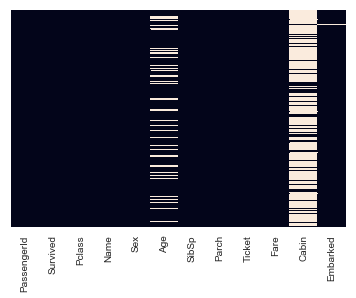

In [66]:
sb.heatmap(train.isnull(),yticklabels=False,cbar=False) #white coloured stripe is for missing value

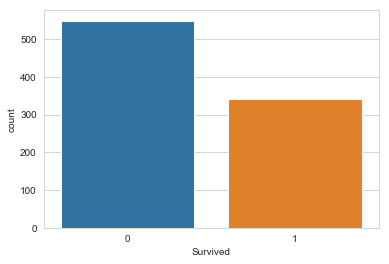

In [67]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=train)

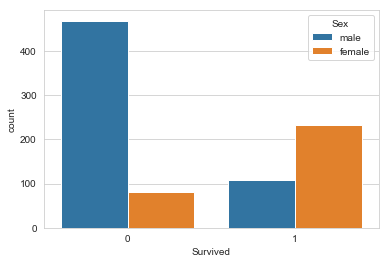

In [68]:
sb.countplot(x='Survived',data=train,hue='Sex')

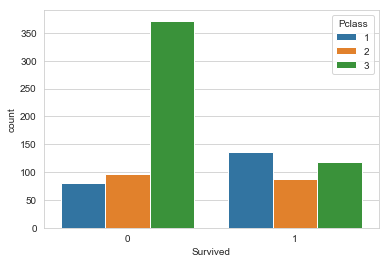

In [69]:
sb.countplot(x='Survived',data=train,hue='Pclass')

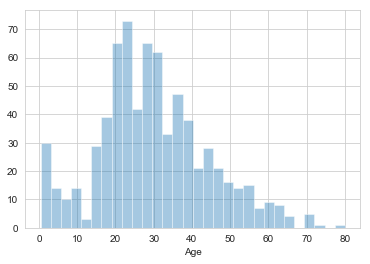

In [70]:
sb.distplot(train['Age'].dropna(),kde=False,bins=30)

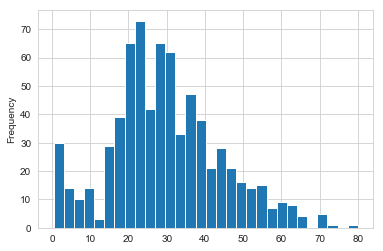

In [71]:
train['Age'].plot.hist(bins=30)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


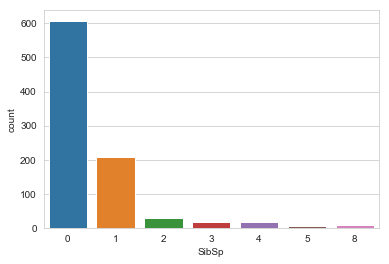

In [73]:
sb.countplot(x='SibSp',data=train)

### Data Cleaning for ML model

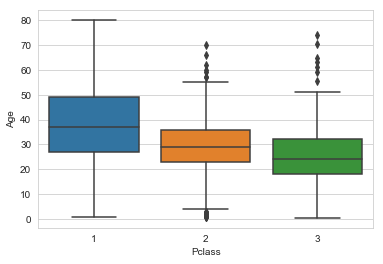

In [74]:
sb.boxplot(x='Pclass',y='Age',data=train)

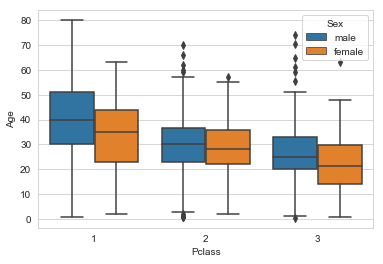

In [75]:
sb.boxplot(x='Pclass',y='Age',data=train,hue='Sex')

#### Handling the missing values

In [76]:
p1m = train[(train['Pclass']==1)&(train['Sex']=='male')]
p1m = np.mean(p1m['Age'])
p1f = train[(train['Pclass']==1)&(train['Sex']=='female')]
p1f = np.mean(p1f['Age'])
print("Class_1 : Male avg. age:",p1m,", Female avg. age:",p1f,'\n')

p2m = train[(train['Pclass']==2)&(train['Sex']=='male')]
p2m = np.mean(p2m['Age'])
p2f = train[(train['Pclass']==2)&(train['Sex']=='female')]
p2f = np.mean(p2f['Age'])
print("Class_2 : Male avg. age:",p2m,", Female avg. age:",p2f,'\n')

p3m = train[(train['Pclass']==3)&(train['Sex']=='male')]
p3m = np.mean(p3m['Age'])
p3f = train[(train['Pclass']==3)&(train['Sex']=='female')]
p3f = np.mean(p3f['Age'])
print("Class_3 : Male avg. age:",p3m,", Female avg. age:",p3f,'\n')

Class_1 : Male avg. age: 41.28138613861386 , Female avg. age: 34.61176470588235 

Class_2 : Male avg. age: 30.74070707070707 , Female avg. age: 28.722972972972972 

Class_3 : Male avg. age: 26.507588932806325 , Female avg. age: 21.75 



In [77]:
def fill_age(value): #fill the missing age with respect to pclass and sex by taking mean value of age.
    age = value[0];
    pclass = value[1];
    gender = value[2];
    if pd.isnull(age):
        if pclass == 1:
            if gender == 'male':
                return p1m
            else:
                return p1f
        elif pclass == 2:
            if gender == 'male':
                return p2m
            else:
                return p2f
        else:
            if gender == 'male':
                return p3m
            else:
                return p3f
    else:
        return age

In [78]:
train['Age'] = train[['Age','Pclass','Sex']].apply(fill_age,axis=1)

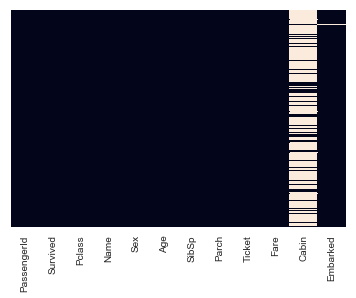

In [79]:
sb.heatmap(train.isnull(),yticklabels=False,cbar=False)

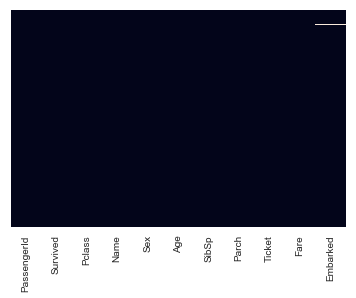

In [80]:
train.drop('Cabin',axis=1,inplace=True)
sb.heatmap(train.isnull(),yticklabels=False,cbar=False)

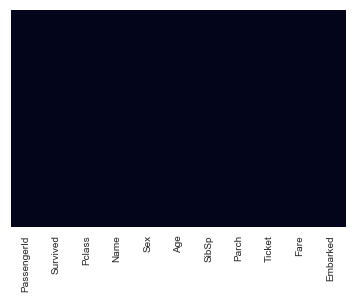

In [81]:
train.dropna(inplace=True)
sb.heatmap(train.isnull(),yticklabels=False,cbar=False)

#### handling the categorical data 

In [88]:
sex = pd.get_dummies(train['Sex'],drop_first=True) #1->MALE,0->FEMALE
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [90]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [91]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [92]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [93]:
train.drop('PassengerId',axis=1,inplace=True)
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [110]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)
pclass.head(2)

,2,3
0,0,1
1,0,0


In [113]:
train = pd.concat([train,pclass],axis=1)
train.drop('Pclass',axis=1).head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,2,3,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,1,0,1


### Model spliting and Training

In [114]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logmodel = LogisticRegression()

In [119]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction

In [120]:
prediction = logmodel.predict(X_test)

In [121]:
from sklearn.metrics import classification_report 

In [122]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       167
           1       0.79      0.70      0.74       100

   micro avg       0.82      0.82      0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.82      0.81       267



In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(y_test,prediction)

array([[148,  19],
       [ 30,  70]], dtype=int64)

In [125]:
accuracy = logmodel.score(X_test,y_test)
print("Accuracy :",accuracy*100,"%")

Accuracy : 81.64794007490637 %
